<a href="https://colab.research.google.com/github/james130625/notebook/blob/main/Alligator%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


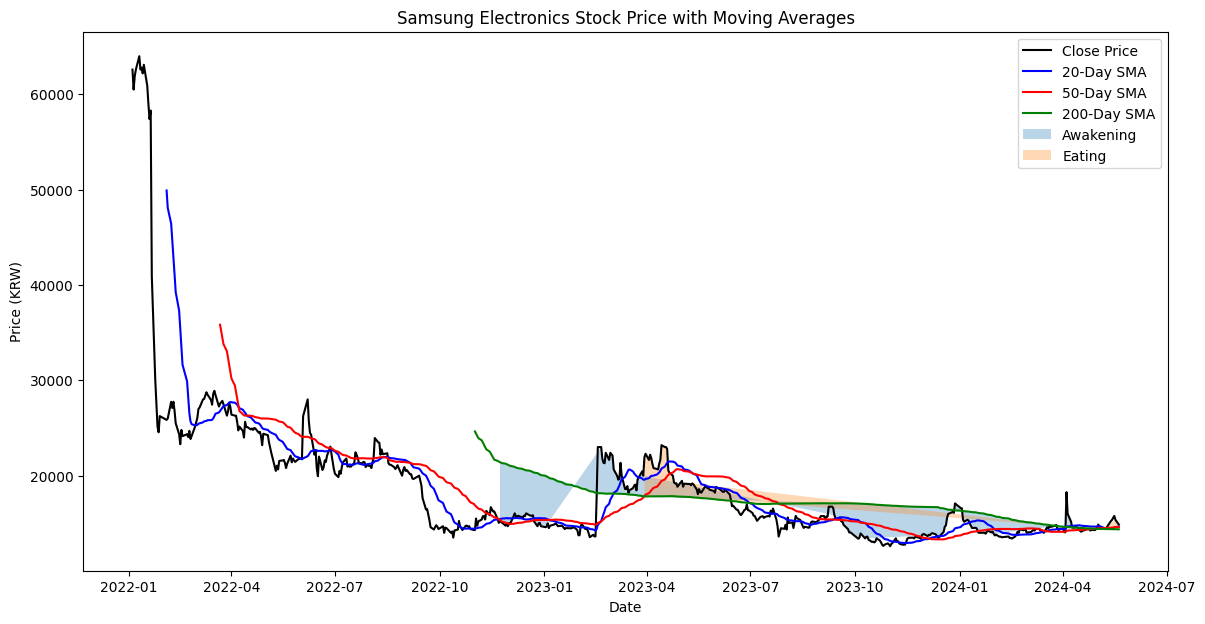

'Eating'

In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Define the stock ticker and date range
ticker = "065660.KQ"
start_date = "2022-01-02"
end_date = "2024-05-21"

# Download stock data
samsung_stock = yf.download(ticker, start=start_date, end=end_date)

# Calculate the moving averages
samsung_stock['SMA20'] = samsung_stock['Close'].rolling(window=20).mean()
samsung_stock['SMA50'] = samsung_stock['Close'].rolling(window=50).mean()
samsung_stock['SMA200'] = samsung_stock['Close'].rolling(window=200).mean()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(samsung_stock['Close'], label='Close Price', color='black')
plt.plot(samsung_stock['SMA20'], label='20-Day SMA', color='blue')
plt.plot(samsung_stock['SMA50'], label='50-Day SMA', color='red')
plt.plot(samsung_stock['SMA200'], label='200-Day SMA', color='green')
plt.title('Samsung Electronics Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()

# Identify the phases: Sleeping, Awakening, Eating
samsung_stock['Phase'] = 'Sleeping'

# Set conditions for different phases
conditions = [
    (samsung_stock['SMA20'] > samsung_stock['SMA50']) & (samsung_stock['SMA50'] > samsung_stock['SMA200']),
    (samsung_stock['SMA20'] > samsung_stock['SMA50']) & (samsung_stock['SMA50'] < samsung_stock['SMA200']),
]

choices = ['Eating', 'Awakening']

samsung_stock['Phase'] = np.select(conditions, choices, default='Sleeping')

# Plot the phases
phases = samsung_stock[samsung_stock['Phase'] != 'Sleeping']
for phase in ['Awakening', 'Eating']:
    phase_data = phases[phases['Phase'] == phase]
    plt.fill_between(phase_data.index, phase_data['SMA200'], phase_data['Close'], label=phase, alpha=0.3)

plt.legend()
plt.show()

# Display the phase of the most recent data point
current_phase = samsung_stock['Phase'].iloc[-1]

# Save the dataframe with phases for review
samsung_stock.to_csv("Samsung_Stock_Phases.csv")

current_phase

[*********************100%%**********************]  1 of 1 completed


실시간 현재가: 15150.0
52주 최고가: 19820.0
52주 최저가: 12300.0
EMA(9): 15061.158874281811
EMA(12): 15006.814510186749
EMA(26): 14832.502078796228
EMA(50): 14678.199990821164
EMA(100): 14572.886571893527
EMA(200): 15055.610654071112
MACD: 174.31243139052094
MACD Signal Line: 136.99732501260294
RSI: 60.674157303370784
볼린저밴드 상한선: 15658.246364695095
볼린저밴드 하한선: 13874.753635304905
주간 변동성: 0.05595340791503424
주간 가격 변동: -0.014313597918022114
월간 가격 변동: 0.05281445448227928
최종분석 결과: Bullish


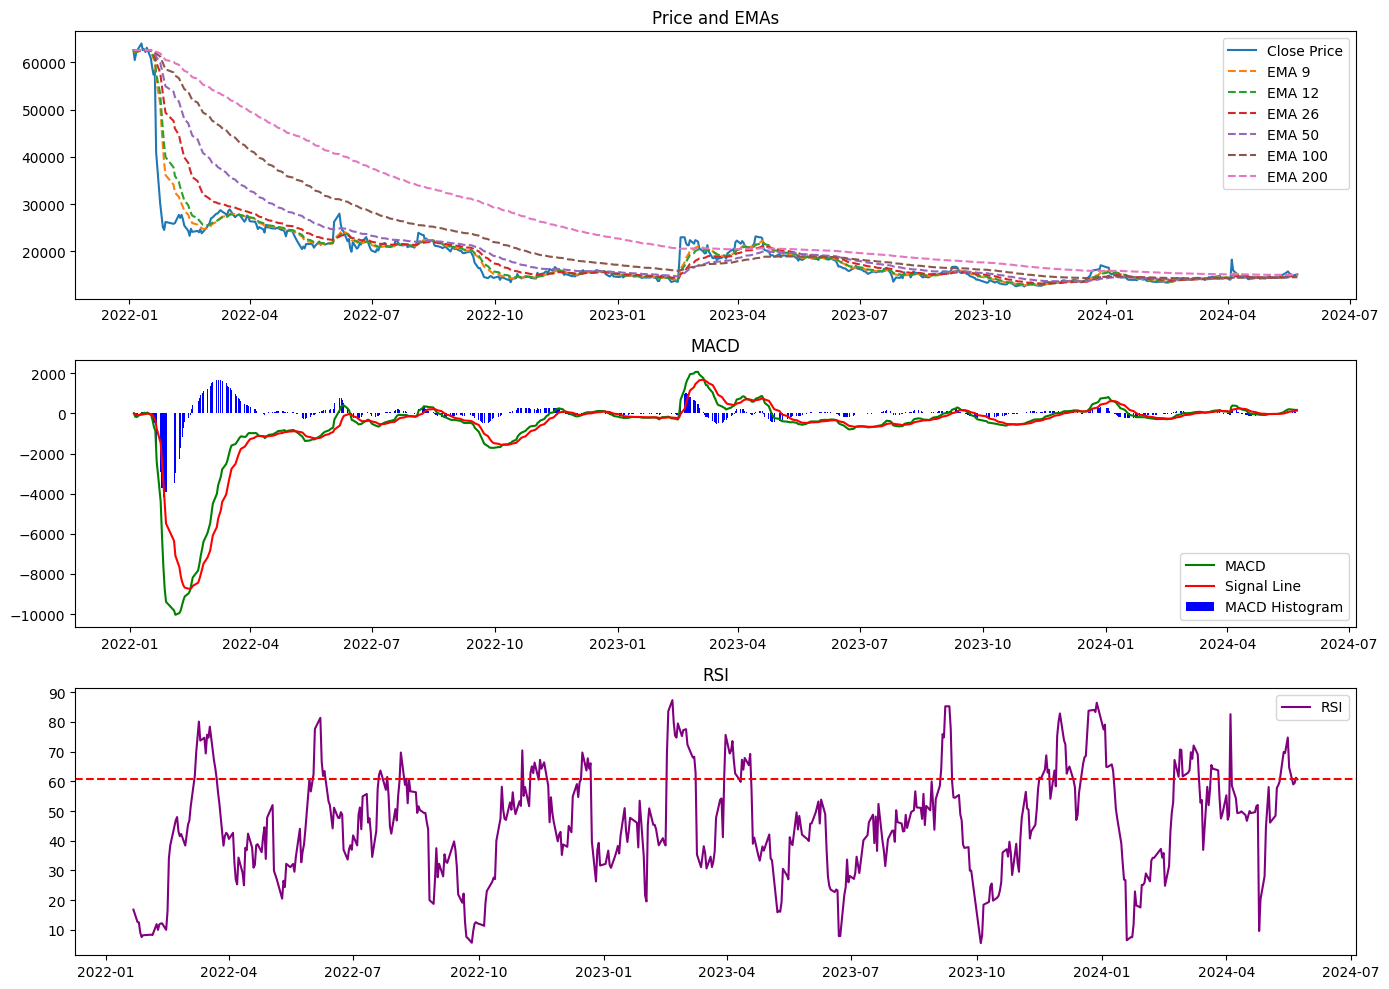

In [12]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 주식 데이터 수집
ticker = '065660.KQ'  # 안트로젠 (KOSDAQ)
data = yf.download(ticker, start='2022-01-02', end=pd.Timestamp.today().strftime('%Y-%m-%d'))

# 실시간 현재가
real_time_price = data['Close'][-1]

# 52주 최고가와 최저가
high_52week = data['High'][-252:].max()
low_52week = data['Low'][-252:].min()

# EMA 계산
data['EMA_9'] = data['Close'].ewm(span=9, adjust=False).mean()
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_100'] = data['Close'].ewm(span=100, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

# MACD 계산
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['Signal_Line']

# RSI 계산
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# 볼린저 밴드 계산
data['20_SMA'] = data['Close'].rolling(window=20).mean()
data['Upper_Band'] = data['20_SMA'] + (data['Close'].rolling(window=20).std() * 2)
data['Lower_Band'] = data['20_SMA'] - (data['Close'].rolling(window=20).std() * 2)

# 주간 변동성 계산
data['Weekly_Volatility'] = data['Close'].pct_change().rolling(window=7).std() * np.sqrt(7)

# 주간 가격 변동
weekly_change = data['Close'].resample('W').ffill().pct_change()

# 월간 가격 변동
monthly_change = data['Close'].resample('M').ffill().pct_change()

# 최종분석 결과
trend_macd = "Bullish" if data['MACD'][-1] > data['Signal_Line'][-1] else "Bearish"
trend_rsi = "Bullish" if data['RSI'][-1] > 60.67 else "Bearish"
trend_bbands = "Bullish" if data['Close'][-1] > data['20_SMA'][-1] else "Bearish"

final_trend = "Bullish" if (trend_macd == "Bullish" and trend_rsi == "Bullish" and trend_bbands == "Bullish") else "Bearish"

# 결과 출력
print(f"실시간 현재가: {real_time_price}")
print(f"52주 최고가: {high_52week}")
print(f"52주 최저가: {low_52week}")
print(f"EMA(9): {data['EMA_9'][-1]}")
print(f"EMA(12): {data['EMA_12'][-1]}")
print(f"EMA(26): {data['EMA_26'][-1]}")
print(f"EMA(50): {data['EMA_50'][-1]}")
print(f"EMA(100): {data['EMA_100'][-1]}")
print(f"EMA(200): {data['EMA_200'][-1]}")
print(f"MACD: {data['MACD'][-1]}")
print(f"MACD Signal Line: {data['Signal_Line'][-1]}")
print(f"RSI: {data['RSI'][-1]}")
print(f"볼린저밴드 상한선: {data['Upper_Band'][-1]}")
print(f"볼린저밴드 하한선: {data['Lower_Band'][-1]}")
print(f"주간 변동성: {data['Weekly_Volatility'][-1]}")
print(f"주간 가격 변동: {weekly_change[-1]}")
print(f"월간 가격 변동: {monthly_change[-1]}")
print(f"최종분석 결과: {final_trend}")

# 차트 생성
plt.figure(figsize=(14, 10))

# 가격 차트와 이동 평균선
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price')
plt.plot(data['EMA_9'], label='EMA 9', linestyle='--')
plt.plot(data['EMA_12'], label='EMA 12', linestyle='--')
plt.plot(data['EMA_26'], label='EMA 26', linestyle='--')
plt.plot(data['EMA_50'], label='EMA 50', linestyle='--')
plt.plot(data['EMA_100'], label='EMA 100', linestyle='--')
plt.plot(data['EMA_200'], label='EMA 200', linestyle='--')
plt.title('Price and EMAs')
plt.legend()

# MACD 차트
plt.subplot(3, 1, 2)
plt.plot(data['MACD'], label='MACD', color='g')
plt.plot(data['Signal_Line'], label='Signal Line', color='r')
plt.bar(data.index, data['MACD_Hist'], label='MACD Histogram', color='b')
plt.title('MACD')
plt.legend()

# RSI와 볼린저 밴드
plt.subplot(3, 1, 3)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(y=60.67, color='r', linestyle='--')
plt.title('RSI')
plt.legend()

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


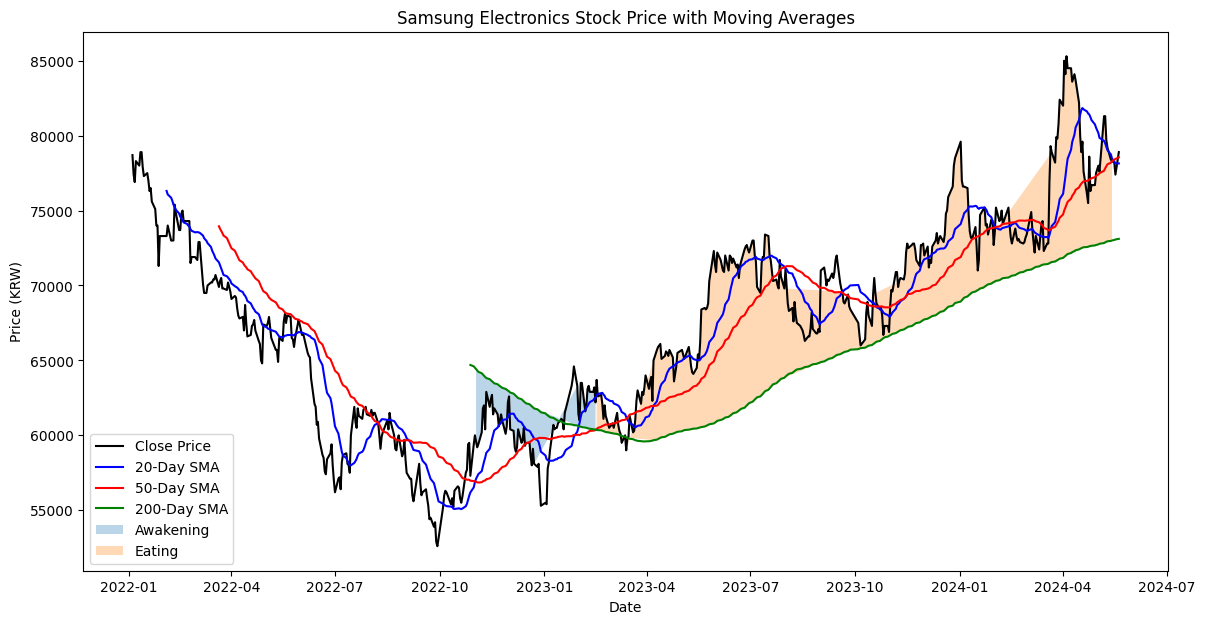

'Sleeping'

In [13]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Define the stock ticker and date range
ticker = "005930.KS"  # Samsung Electronics ticker on KRX
start_date = "2022-01-02"
end_date = "2024-05-21"

# Download stock data
samsung_stock = yf.download(ticker, start=start_date, end=end_date)

# Calculate the moving averages
samsung_stock['SMA20'] = samsung_stock['Close'].rolling(window=20).mean()
samsung_stock['SMA50'] = samsung_stock['Close'].rolling(window=50).mean()
samsung_stock['SMA200'] = samsung_stock['Close'].rolling(window=200).mean()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(samsung_stock['Close'], label='Close Price', color='black')
plt.plot(samsung_stock['SMA20'], label='20-Day SMA', color='blue')
plt.plot(samsung_stock['SMA50'], label='50-Day SMA', color='red')
plt.plot(samsung_stock['SMA200'], label='200-Day SMA', color='green')
plt.title('Samsung Electronics Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()

# Identify the phases: Sleeping, Awakening, Eating
samsung_stock['Phase'] = 'Sleeping'

# Set conditions for different phases
conditions = [
    (samsung_stock['SMA20'] > samsung_stock['SMA50']) & (samsung_stock['SMA50'] > samsung_stock['SMA200']),
    (samsung_stock['SMA20'] > samsung_stock['SMA50']) & (samsung_stock['SMA50'] < samsung_stock['SMA200']),
]

choices = ['Eating', 'Awakening']

samsung_stock['Phase'] = np.select(conditions, choices, default='Sleeping')

# Plot the phases
phases = samsung_stock[samsung_stock['Phase'] != 'Sleeping']
for phase in ['Awakening', 'Eating']:
    phase_data = phases[phases['Phase'] == phase]
    plt.fill_between(phase_data.index, phase_data['SMA200'], phase_data['Close'], label=phase, alpha=0.3)

plt.legend()
plt.show()

# Display the phase of the most recent data point
current_phase = samsung_stock['Phase'].iloc[-1]

# Save the dataframe with phases for review
samsung_stock.to_csv("Samsung_Stock_Phases.csv")

current_phase
